In [1]:
import pandas as pd
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
from scipy import stats 

plt.style.use('seaborn') 

import warnings 
warnings.filterwarnings("ignore") 

mpl.rcParams['axes.unicode_minus'] = False 

%matplotlib inline

In [2]:
df_train = pd.read_csv("train.csv", parse_dates = ["datetime"]) 
df_test = pd.read_csv("test.csv", parse_dates = ["datetime"])

In [3]:
df_train["year"] = df_train["datetime"].dt.year
df_train["month"] = df_train["datetime"].dt.month
df_train["day"] = df_train["datetime"].dt.day
df_train["hour"] = df_train["datetime"].dt.hour

df_test["year"] = df_test["datetime"].dt.year 
df_test["month"] = df_test["datetime"].dt.month 
df_test["day"] = df_test["datetime"].dt.day
df_test["hour"] = df_test["datetime"].dt.hour

df_train["dayofweek"] = df_train["datetime"].dt.dayofweek
df_test["dayofweek"] = df_test["datetime"].dt.dayofweek
#요일 변수 추가생성

[Text(0.5, 1.0, 'windspeed')]

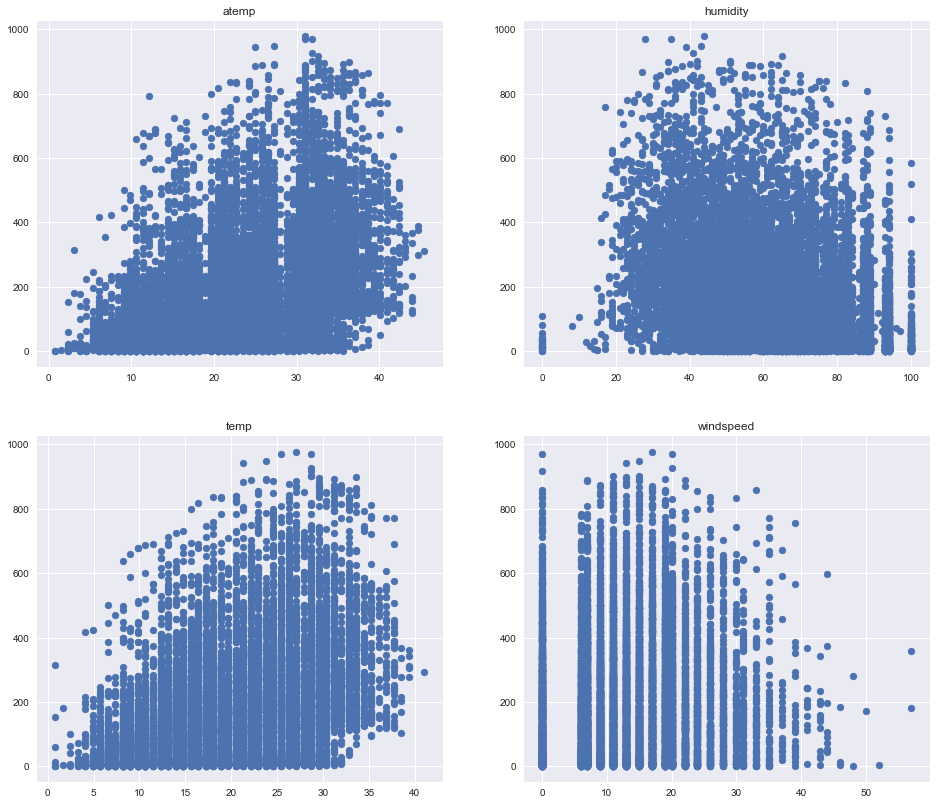

In [4]:
fig, ax = plt.subplots(2, 2, figsize=(16,14))

#scatter plot
ax[0][0].scatter(df_train['atemp'], df_train['count'], )
ax[0][1].scatter(df_train['humidity'], df_train['count'])
ax[1][0].scatter(df_train['temp'], df_train['count'])
ax[1][1].scatter(df_train['windspeed'], df_train['count'])

#title 지정
ax[0][0].set(title='atemp')
ax[0][1].set(title='humidity')
ax[1][0].set(title='temp')
ax[1][1].set(title='windspeed')

# windspeed 값은 count예측의 상관관계가 크게 없음
# humidity 0과 100 예측해보기

In [5]:
#df_train.drop('datetime', axis='columns', inplace=True)
#df_test.drop('datetime', axis='columns', inplace=True)
#df_train.head()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [7]:
df_train[(df_train['humidity']==0)|(df_train['humidity']==100)] = df_train['humidity'].mean()
# humidity 0과 100 값 대신 평균값을 넣어줌

<AxesSubplot:xlabel='humidity', ylabel='count'>

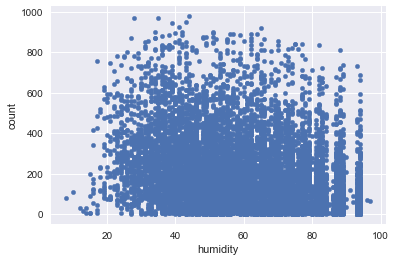

In [8]:
df_train.plot(kind='scatter', x='humidity', y='count')

In [9]:
feature_names = ["season", "weather", "temp", "atemp", "humidity", "windspeed",
                 "year", "hour", "dayofweek", "holiday", "workingday"]

feature_names

['season',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'hour',
 'dayofweek',
 'holiday',
 'workingday']

In [10]:
X_train = df_train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1.0,1.0,9.84,14.395,81.0,0.0,2011.0,0.0,5.0,0.0,0.0
1,1.0,1.0,9.02,13.635,80.0,0.0,2011.0,1.0,5.0,0.0,0.0
2,1.0,1.0,9.02,13.635,80.0,0.0,2011.0,2.0,5.0,0.0,0.0
3,1.0,1.0,9.84,14.395,75.0,0.0,2011.0,3.0,5.0,0.0,0.0
4,1.0,1.0,9.84,14.395,75.0,0.0,2011.0,4.0,5.0,0.0,0.0


In [11]:
X_test = df_test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,1,10.66,11.365,56,26.0027,2011,0,3,0,1
1,1,1,10.66,13.635,56,0.0000,2011,1,3,0,1
2,1,1,10.66,13.635,56,0.0000,2011,2,3,0,1
3,1,1,10.66,12.880,56,11.0014,2011,3,3,0,1
4,1,1,10.66,12.880,56,11.0014,2011,4,3,0,1


In [12]:
y_train = df_train['count']

print(y_train.shape)
y_train.head()

(10886,)


0    16.0
1    40.0
2    32.0
3    13.0
4     1.0
Name: count, dtype: float64

In [13]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
prediction_mean = model.predict(X_test)

print(prediction_mean.shape)
prediction_mean[0:20]

(6493,)


array([ 12.44,   5.22,   4.15,   3.44,   2.91,   6.72,  38.19, 106.91,
       238.93, 139.53,  63.2 ,  64.15,  95.02,  75.77,  89.69,  86.72,
       100.64, 207.77, 175.84, 100.58])

[Text(0.5, 1.0, 'test')]

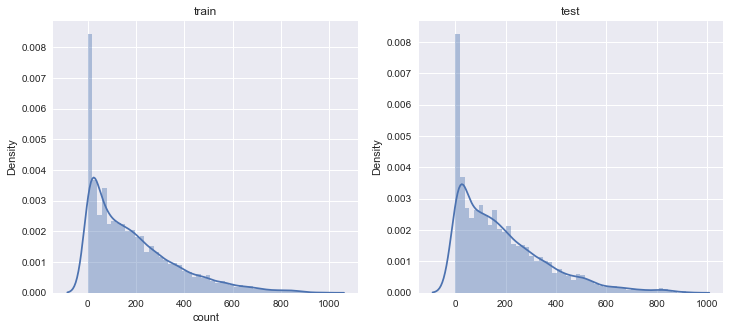

In [14]:
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(prediction_mean, ax=ax2,bins=50)
ax2.set(title="test")

In [22]:
submission = pd.read_csv("sampleSubmission.csv")
submission

submission["count"] = prediction_mean
submission['datetime'] = df_test['datetime']
print(submission.shape)
submission.head()
submission.to_csv('sampleSubmission.csv', index=False)

(6493, 2)


In [23]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,12.44
1,2011-01-20 01:00:00,5.22
2,2011-01-20 02:00:00,4.15
3,2011-01-20 03:00:00,3.44
4,2011-01-20 04:00:00,2.91
